In [27]:
import csv
import pandas as pd
import shap
import sklearn
import numpy as np
import matplotlib
import interpret.glassbox
data = pd.read_csv('cohortpetit.csv')
data2 = pd.read_csv('cohort100.csv')

In [28]:
y = (data['i.coronari'])
data = data.drop(['i.death', 'id', 'i.coronari', 'i.angor', 'i.ami'], axis = 1)

In [29]:
feature_names = [i for i in data.columns if data[i].dtype in [np.int64, np.int64]]
# feature_names = [i for i in data.columns ]
X = data[feature_names]
# my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)
# model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
# model_ebm.fit(X, y)
##########
X100 = data2[feature_names]

In [30]:
clustering = shap.utils.hclust(X, y)

No/low signal found from feature 0 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 1 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
No/low signal found from feature 2 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
 93%|████████████████████████████████████████▏  | 14/15 [01:00<00:07,  7.90s/it]No/low signal found from feature 13 (this is typically caused by constant or near-constant features)! Cluster distances can't be computed for it (so setting all distances to 1).
16it [01:07,  6.72s/it]                                                         


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[15:08:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


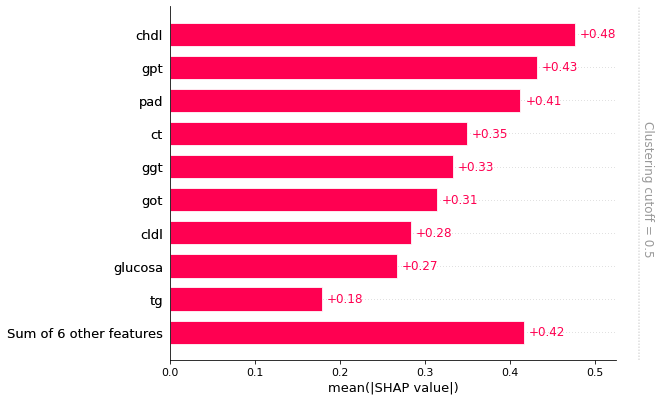

In [31]:
# I should probably delete all binary variables for this
import xgboost
background_adult = shap.maskers.Independent(X, max_samples=100)
model = xgboost.XGBClassifier(n_estimators=100, max_depth=2).fit(X, y)
explainer = shap.Explainer(model, background_adult)
shap_values = explainer(X)
shap.plots.bar(shap_values, clustering=clustering)

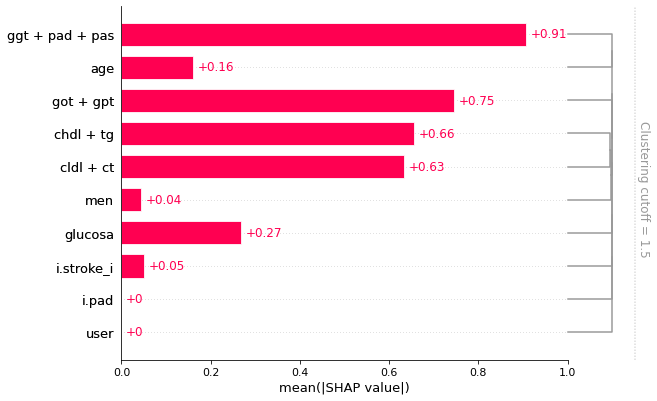

In [32]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.5)